Возьмите датасет Mortality and Water Hardness**
www.kaggle.com...r-hardness

В этом датасете содержатся данные по средней годовой смертности на
100000 населения и концентрации кальция в питьевой воде для 61
большого города в Англии и Уэльсе. Города дополнительно поделены на
северные и южные.

# Задание 1.
Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

Построить точечный график
Рассчитать коэффициенты корреляции Пирсона и Спирмена
Построить модель линейной регрессии
Рассчитать коэффициент детерминации
Вывести график остатков

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("water.csv")

df.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


In [ ]:
df.describe()

,Unnamed: 0,mortality,hardness
count,61.000000,61.000000,61.000000
mean,31.000000,1524.147541,47.180328
std,17.752934,187.668754,38.093966
min,1.000000,1096.000000,5.000000
25%,16.000000,1379.000000,14.000000
50%,31.000000,1555.000000,39.000000
75%,46.000000,1668.000000,75.000000
max,61.000000,1987.000000,138.000000


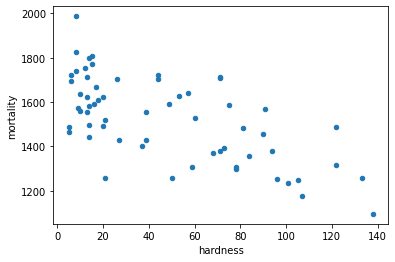

In [ ]:
df.plot(kind='scatter', x='hardness', y='mortality')

In [ ]:
df[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [ ]:
df[['hardness', 'mortality']].corr(method='kendall')

,hardness,mortality
hardness,1.000000,-0.453753
mortality,-0.453753,1.000000


In [ ]:
X = df[['hardness']]
y = df['mortality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(model.coef_, model.intercept_)

[-3.28204413] 1681.6276209577732


In [ ]:
y_pred = model.predict(X_test)
y_pred

array([1337.01298764, 1648.80717969, 1635.67900318, 1537.21767938,
       1425.62817906, 1615.98673842, 1245.11575209, 1435.47431145,
       1612.70469429, 1661.9353562 ])

In [ ]:
model.score(X_test, y_test)

0.583655258547394

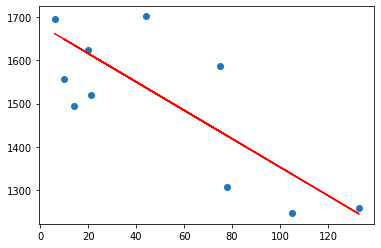

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [ ]:
res = y_test - y_pred
res

0     -90.012988
5     -90.807180
46   -140.679003
31    164.782321
13   -118.628179
55      9.013262
34     13.884248
49    151.525689
12    -93.704694
40     34.064644
Name: mortality, dtype: float64

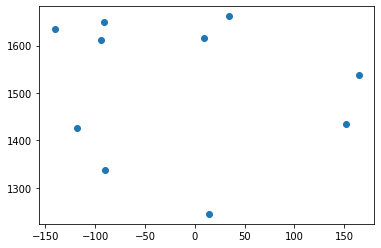

In [ ]:
plt.scatter(res, y_pred)

# Задание 2.
Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

Разделить данные на 2 группы
Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [ ]:
df_n = df.loc[df['location'] == 'North']
df_n

,Unnamed: 0,location,town,mortality,hardness
1,2,North,Birkenhead,1668,17
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
5,6,North,Bolton,1558,10
6,7,North,Bootle,1807,15
8,9,North,Bradford,1637,10
11,12,North,Burnley,1755,12
15,16,North,Darlington,1491,20
16,17,North,Derby,1555,39
17,18,North,Doncaster,1428,39


In [ ]:
df_s = df.loc[df['location'] == 'South']
df_s

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
2,3,South,Birmingham,1466,5
7,8,South,Bournemouth,1299,78
9,10,South,Brighton,1359,84
10,11,South,Bristol,1392,73
12,13,South,Cardiff,1519,21
13,14,South,Coventry,1307,78
14,15,South,Croydon,1254,96
18,19,South,East Ham,1318,122
19,20,South,Exeter,1260,21


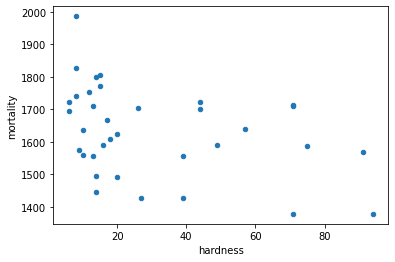

In [ ]:
df_n.plot(kind='scatter', x='hardness', y='mortality')

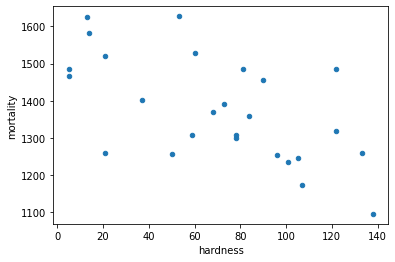

In [ ]:
df_s.plot(kind='scatter', x='hardness', y='mortality')


In [ ]:
df_n[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [ ]:
df_s[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [ ]:
df_n[['hardness', 'mortality']].corr(method='kendall')

,hardness,mortality
hardness,1.000000,-0.283058
mortality,-0.283058,1.000000


In [ ]:
df_s[['hardness', 'mortality']].corr(method='kendall')

,hardness,mortality
hardness,1.000000,-0.440315
mortality,-0.440315,1.000000


In [ ]:
X = df_n[['hardness']]
y = df_n['mortality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(model.coef_, model.intercept_)

[-1.97686226] 1688.150229031281


In [ ]:
y_pred = model.predict(X_test)
y_pred

array([1672.33533095, 1670.35846869, 1660.47415739, 1676.28905547,
       1656.52043287, 1547.79300857, 1601.16828959, 1672.33533095,
       1611.05260089, 1658.49729513, 1611.05260089])

In [ ]:
model.score(X_test, y_test)

0.018885304285745863

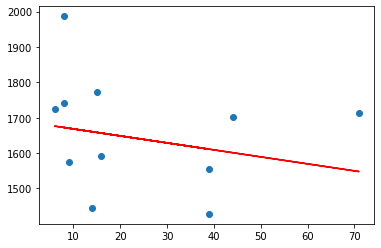

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [ ]:
res = y_test - y_pred
res

45    314.664669
23    -96.358469
43   -216.474157
36     47.710945
26    -65.520433
50    165.206991
31    100.831710
22     69.664669
16    -56.052601
28    113.502705
17   -183.052601
Name: mortality, dtype: float64

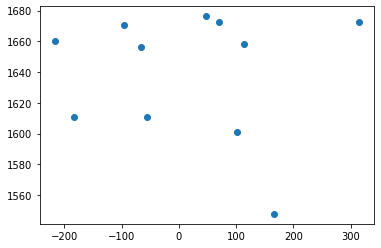

In [ ]:
plt.scatter(res, y_pred)

In [ ]:
X = df_s[['hardness']]
y = df_s['mortality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(model.coef_, model.intercept_)

[-3.51342921] 1640.2204603423374


In [ ]:
y_pred = model.predict(X_test)
y_pred

array([1211.58209643, 1622.65331428, 1271.31039304, 1211.58209643,
       1510.22357948, 1566.43844688, 1432.92813681, 1622.65331428])

In [ ]:
model.score(X_test, y_test) 

-2.5519223012352077

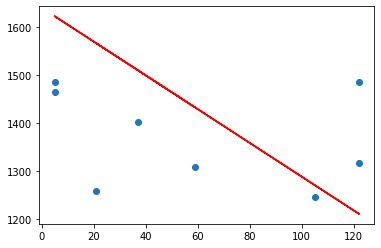

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [ ]:
res = y_test - y_pred
res

18    106.417904
38   -136.653314
0     -24.310393
58    274.417904
27   -108.223579
19   -306.438447
33   -123.928137
2    -156.653314
Name: mortality, dtype: float64

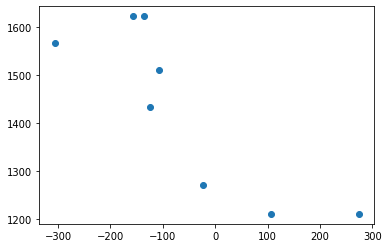

In [ ]:
plt.scatter(res, y_pred)

# Вывод: зависимость не сохраняется для южных городов

Алексей, спасибо, тут так же отличная работа, я бы особо отметил в выводах, что при разделении датасета данных просто остается очень мало для построения адекватной модели, это как раз и видно по коэффициентам детерминации (мы тут не можем с уверенностью судить о наличии/отсутствии взаимосвязи).

Рекомендую ознакомиться вот с этим материалом для более подробного изучения графиков остатков:http://www.machinelearning.ru/wiki/index.php?title=%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D0%BE%D0%BD%D0%BD%D1%8B%D1%85_%D0%BE%D1%81%D1%82%D0%B0%D1%82%D0%BA%D0%BE%D0%B2_(%D0%BF%D1%80%D0%B8%D0%BC%D0%B5%D1%80) 

А вот эти материалы пригодятся для понимания оптимизации моделей и дальнейшего погружения в тему:

https://blog.quantinsti.com/linear-regression-models-scikit-learn/ 
http://pavelbazin.com/post/linear-regression-hyperparameters/ 
Зачет!